In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [116]:
df = pandas.read_csv('raw_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11409 entries, 0 to 11408
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       11409 non-null  int64  
 1   brand              11343 non-null  object 
 2   model              11343 non-null  object 
 3   price              11343 non-null  object 
 4   year               11343 non-null  float64
 5   mileage            11293 non-null  object 
 6   city               11343 non-null  object 
 7   transmission_type  11343 non-null  object 
 8   color              11343 non-null  object 
 9   fuel               11343 non-null  object 
 10  date               11409 non-null  object 
 11  Unnamed: 0         6159 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.0+ MB


it is clear that we have null values

In [117]:
df

,Unnamed: 0.1,brand,model,price,year,mileage,city,transmission_type,color,fuel,date,Unnamed: 0
0,0,اودي || Audi,Q3,"2,250,000 جنيه",2021.0,"65,000 كم",6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21,NaN
1,1,مرسيدس || Mercedes,C 180,"2,650,000 جنيه",2022.0,"38,000 كم",6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21,NaN
2,2,تويوتا || Toyota,لاند كروزر || Land Cruiser,"9,500,000 جنيه",2024.0,0 كم,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21,NaN
3,3,هيونداي || Hyundai,اكسنت RB || Accent RB,"705,000 جنيه",2019.0,"27,000 كم",القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21,NaN
4,4,كيا || Kia,سبورتاج || Sportage,"1,400,000 جنيه",2021.0,68 كم,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11404,6154,نيسان || Nissan,سنترا || Sentra,"485,000 جنيه",2013.0,"133,000 كم",المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18,6154.0
11405,6155,اوبل || Opel,كورسا || Corsa,"230,000 جنيه",2006.0,"177,000 كم",أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18,6155.0
11406,6156,سيتروين || Citroën,C5,"570,000 جنيه",2014.0,"190,000 كم",6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26,6156.0
11407,6157,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,"480,000 جنيه",2013.0,"177,000 كم",6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26,6157.0


there is no need for column `Unnamed: 0.1`, that has the index value or column `Unnamed: 0` that has many null values

In [118]:
df = df.drop('Unnamed: 0.1', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [119]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,اودي || Audi,Q3,"2,250,000 جنيه",2021.0,"65,000 كم",6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21
1,مرسيدس || Mercedes,C 180,"2,650,000 جنيه",2022.0,"38,000 كم",6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21
2,تويوتا || Toyota,لاند كروزر || Land Cruiser,"9,500,000 جنيه",2024.0,0 كم,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21
3,هيونداي || Hyundai,اكسنت RB || Accent RB,"705,000 جنيه",2019.0,"27,000 كم",القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21
4,كيا || Kia,سبورتاج || Sportage,"1,400,000 جنيه",2021.0,68 كم,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,نيسان || Nissan,سنترا || Sentra,"485,000 جنيه",2013.0,"133,000 كم",المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18
11405,اوبل || Opel,كورسا || Corsa,"230,000 جنيه",2006.0,"177,000 كم",أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18
11406,سيتروين || Citroën,C5,"570,000 جنيه",2014.0,"190,000 كم",6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26
11407,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,"480,000 جنيه",2013.0,"177,000 كم",6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26


In [120]:
df = df.dropna()
df.isnull().sum()

brand                0
model                0
price                0
year                 0
mileage              0
city                 0
transmission_type    0
color                0
fuel                 0
date                 0
dtype: int64

In [121]:
df['price'] = df['price'].astype(str).str.replace(r'[^\d]', '', regex=True)
df['mileage'] = df['mileage'].astype(str).str.replace(r'[^\d]', '', regex=True)

C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\2390931076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(str).str.replace(r'[^\d]', '', regex=True)
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\2390931076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].astype(str).str.replace(r'[^\d]', '', regex=True)


In [122]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,اودي || Audi,Q3,2250000,2021.0,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21
1,مرسيدس || Mercedes,C 180,2650000,2022.0,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21
2,تويوتا || Toyota,لاند كروزر || Land Cruiser,9500000,2024.0,0,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21
3,هيونداي || Hyundai,اكسنت RB || Accent RB,705000,2019.0,27000,القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21
4,كيا || Kia,سبورتاج || Sportage,1400000,2021.0,68,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,نيسان || Nissan,سنترا || Sentra,485000,2013.0,133000,المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18
11405,اوبل || Opel,كورسا || Corsa,230000,2006.0,177000,أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18
11406,سيتروين || Citroën,C5,570000,2014.0,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26
11407,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,480000,2013.0,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26


In [123]:
df['year'] = df['year'].astype(int)
df['mileage'] = df['mileage'].astype(int)
df['price'] = df['price'].astype(int)


C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\140565267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\140565267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].astype(int)
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\140565267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [124]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,اودي || Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21
1,مرسيدس || Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21
2,تويوتا || Toyota,لاند كروزر || Land Cruiser,9500000,2024,0,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21
3,هيونداي || Hyundai,اكسنت RB || Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21
4,كيا || Kia,سبورتاج || Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,نيسان || Nissan,سنترا || Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18
11405,اوبل || Opel,كورسا || Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18
11406,سيتروين || Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26
11407,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26


In [125]:
def modify(text):
    if '||' in text:
        return text.split("||")[-1].strip()
    return text


df['brand'] = df['brand'].astype(str).apply(modify)
df['model'] = df['model'].astype(str).apply(modify)

C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\1474797695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['brand'].astype(str).apply(modify)
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\1474797695.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].astype(str).apply(modify)


In [126]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21
1,Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21
2,Toyota,Land Cruiser,9500000,2024,0,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21
3,Hyundai,Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21
4,Kia,Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,Nissan,Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18
11405,Opel,Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18
11406,Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26
11407,Citroën,C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26


In [ ]:
from datetime import datetime

df['date'] = df['date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df['date'] = pd.to_datetime(df['date']).dt.date
df

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11293 entries, 0 to 11408
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              11293 non-null  object
 1   model              11293 non-null  object
 2   price              11293 non-null  int32 
 3   year               11293 non-null  int32 
 4   mileage            11293 non-null  int32 
 5   city               11293 non-null  object
 6   transmission_type  11293 non-null  object
 7   color              11293 non-null  object
 8   fuel               11293 non-null  object
 9   date               11293 non-null  object
dtypes: int32(3), object(7)
memory usage: 838.2+ KB


In [129]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,2025-04-21
1,Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,2025-04-21
2,Toyota,Land Cruiser,9500000,2024,0,المهندسين,أتوماتيك,أبيض,بنزين,2025-04-21
3,Hyundai,Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,2025-04-21
4,Kia,Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,Nissan,Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,2025-02-18
11405,Opel,Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,2025-02-18
11406,Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,2025-01-26
11407,Citroën,C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,2025-01-26


In [130]:
df.isnull().sum()

brand                0
model                0
price                0
year                 0
mileage              0
city                 0
transmission_type    0
color                0
fuel                 0
date                 0
dtype: int64

In [131]:
df.duplicated().sum()

68

There are 68 duplicated rows. They need to be dropped

In [ ]:
df.drop_duplicates(inplace=True)

In [133]:
df.duplicated().sum()

0

In [134]:
df.describe()

,price,year,mileage
count,1.122500e+04,11225.000000,1.122500e+04
mean,8.020501e+05,2013.595813,1.413707e+05
std,7.816702e+05,8.803212,9.681861e+04
min,0.000000e+00,1972.000000,0.000000e+00
25%,3.750000e+05,2009.000000,7.200000e+04
50%,6.200000e+05,2016.000000,1.350000e+05
75%,9.200000e+05,2020.000000,2.000000e+05
max,1.125000e+07,2026.000000,1.450000e+06


There are cars with mileage 0, how and they are used cars ?

In [ ]:
df = df[df['mileage']!=0]
df = df[df['year']<=2025]
df = df[df['price']>=100000]

In [142]:
df.describe()

,price,year,mileage
count,1.062300e+04,10623.000000,1.062300e+04
mean,8.031574e+05,2014.093382,1.490576e+05
std,7.369880e+05,7.920045,9.353543e+04
min,2.500000e+04,1972.000000,1.000000e+00
25%,4.000000e+05,2010.000000,8.300000e+04
50%,6.300000e+05,2016.000000,1.400000e+05
75%,9.200000e+05,2020.000000,2.000000e+05
max,1.125000e+07,2025.000000,1.450000e+06


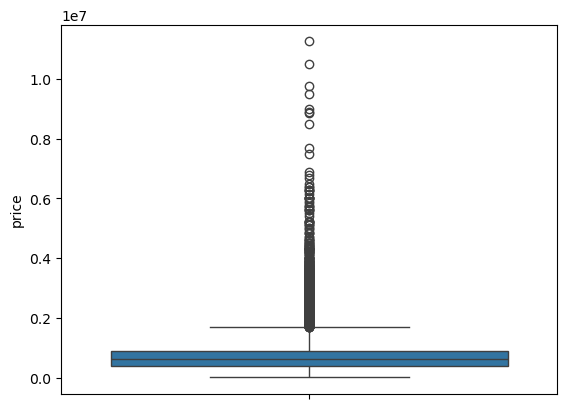

In [143]:
sns.boxplot(df['price'])
plt.show()

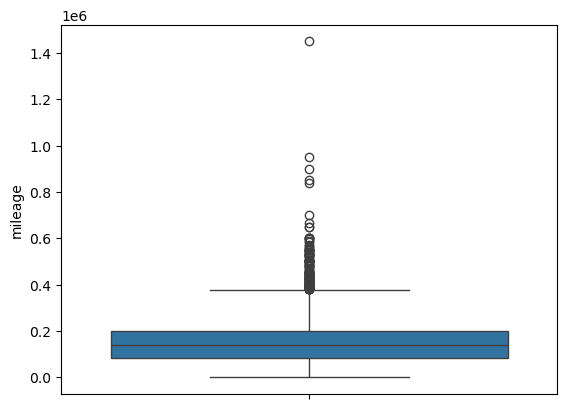

In [144]:
sns.boxplot(df['mileage'])
plt.show()

In [145]:
df.to_csv('cleaned_data.csv', index=False)

In [146]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,2025-04-21
1,Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,2025-04-21
3,Hyundai,Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,2025-04-21
4,Kia,Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,2025-04-21
5,Hyundai,Tucson GDI,1250000,2020,146000,الزقازيق,أتوماتيك,رمادي,بنزين,2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,Nissan,Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,2025-02-18
11405,Opel,Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,2025-02-18
11406,Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,2025-01-26
11407,Citroën,C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,2025-01-26
